<h1 align="center">Zomato Data Analysis Python Project</h1> 

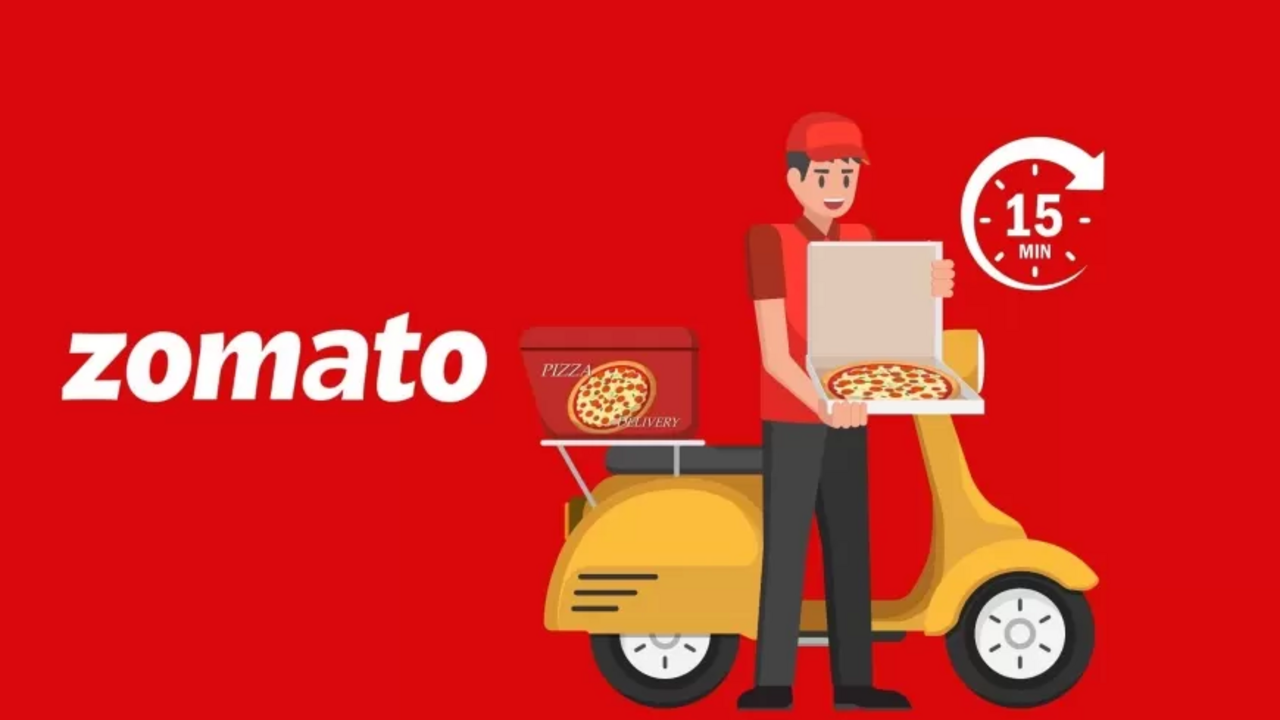

In [1]:
from IPython.display import Image, display

# Set width and height in pixels
display(Image(filename="zomato.png", width=700, height=300))



<h3>Importing necessary libraries</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("zomato.csv")

In [3]:
#checking shape of dataframe
print("shape: ",data.shape)
#checking coumns
print("columns: ",data.columns)

shape:  (51717, 17)
columns:  Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [4]:
#data type checking
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
#data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
#statistical summary 
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


<h3>cleaning the data</h3>

In [7]:
#checking for null values
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
#checking duplicates
data.duplicated().sum()
#output is zero.so no need to remove duplicates
#if duplicates are present then removing duplicates is as follows
#dataframe.drop_duplicates(inplace=True)

0

In [9]:
#handling missing values of rate column by dropping them
data["rate"]=data["rate"].astype(str) #converting datatype to string
data["rate"]=data["rate"].replace(["NEW","-"],np.nan) #replace
data["rate"]=data["rate"].str.replace("/5","")
data["rate"]=data["rate"].astype(float)
print("Datatype: ",data["rate"].dtypes)
print(data["rate"].isnull().sum())
data.head(2)

Datatype:  float64
10052


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [10]:
data.dropna(subset=["rate"],inplace=True)

In [11]:
#checking for any missing values after dropping them
data["rate"].isnull().sum()

0

In [12]:
#filling missing values of location column using the values in listed_in(city) that's in respective row
data["location"]=data["location"].fillna(data["listed_in(city)"])

In [13]:
data["location"]

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51709                    Whitefield
51711                    Whitefield
51712                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 41665, dtype: object

In [14]:
#filling missing values with "unknown"
data["rest_type"]=data["rest_type"].fillna("unknown")
data[data["rest_type"].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [15]:
#checking missing valued row after filling it with "unknown"
data.loc[999]

url                            https://www.zomato.com/bangalore/mughlai-kitch...
address                        77/2 BDA Road, Opposite RR Layout, BTM 6th Sta...
name                                                             Mughlai Kitchen
online_order                                                                 Yes
book_table                                                                    No
rate                                                                         3.5
votes                                                                        269
phone                                         +91 9663197947\r\r\n+91 9986692090
location                                                                     BTM
rest_type                                                                unknown
dish_liked                                                     Momos, Oreo Shake
cuisines                                   Mughlai, North Indian, Chinese, Momos
approx_cost(for two people) 

In [16]:
#filling missing values of dish_liked and cuisines column with "Not available"
data[["dish_liked","cuisines"]]=data[["dish_liked","cuisines"]].fillna("Not available")


In [17]:
#converting approx_cost(for two people) column into float
data["approx_cost(for two people)"]=data["approx_cost(for two people)"].str.replace(",","")
data["approx_cost(for two people)"]=data["approx_cost(for two people)"].astype(float)
data["approx_cost(for two people)"]

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51709     800.0
51711     800.0
51712    1500.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 41665, dtype: float64

In [18]:
data.isnull().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          814
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)    247
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [19]:
#fiiling missing values with median calculated  by performing groupby based on rest_type and location
data["approx_cost(for two people)"] = data["approx_cost(for two people)"].fillna(data.groupby(["rest_type","location"])["approx_cost(for two people)"].transform("median"))
data.loc[49373]

url                            https://www.zomato.com/bangalore/owls-kitchen-...
address                                Chandra Mansion, Sarjapur Road, Bangalore
name                                                               Owl's Kitchen
online_order                                                                  No
book_table                                                                    No
rate                                                                         2.6
votes                                                                         53
phone                                                                        NaN
location                                                           Sarjapur Road
rest_type                                                                unknown
dish_liked                                                   Manchurian, Noodles
cuisines                                                   North Indian, Chinese
approx_cost(for two people) 

In [20]:
data[data["approx_cost(for two people)"].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5797,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Brigade Road
9921,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,BTM
13958,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Electronic City
14552,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Dine-out,Electronic City
17360,https://www.zomato.com/bangalore/familiar-food...,"2614, Opposite CPWD Campus, 27th Main, Sector ...",Familiar Food Court,No,No,2.6,43,NaN,HSR,Food Court,Chaat,"Mughlai, Chinese, North Indian, South Indian, ...",NaN,"[('Rated 1.0', 'RATED\n Ordered chicken schez...",[],Dine-out,HSR
20830,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Jayanagar
28103,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Koramangala 4th Block
30480,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Koramangala 5th Block
33284,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Koramangala 6th Block
35967,https://www.zomato.com/bangalore/priyas-punjab...,"Golla Halli, Electronic City, Phase 1, Near Ta...",Priya's Punjabi,No,No,3.8,33,NaN,Koramangala 8th Block,Casual Dining,Not available,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",[],Delivery,Koramangala 7th Block


In [21]:
#filling columns that have all nan values after grouping, with median
data["approx_cost(for two people)"]=data["approx_cost(for two people)"].fillna(data["approx_cost(for two people)"].median())
data["approx_cost(for two people)"].isnull().sum()

0

In [22]:
#dropping phone,reviews_list,menu_item columns
data.drop(["phone","reviews_list","menu_item"],axis=1,inplace=True)

In [23]:
data.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [24]:
print(data.duplicated().sum())
#data.drop_duplicates(inplace=True)

0


<h3 align="center">Exploring Data Analysis and Visualization</h3>

<h4>1.Location with most restaurants</h4>

Location with most restaurants:  BTM , 3930


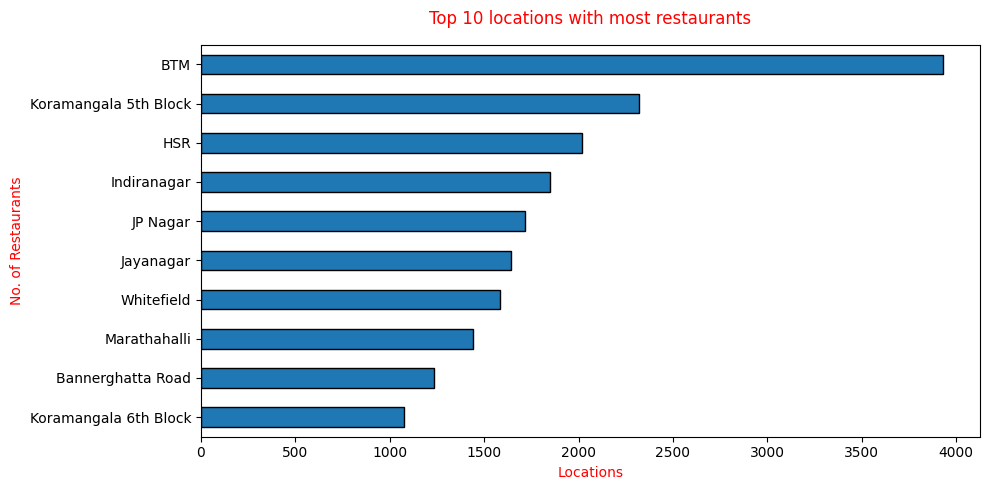

In [25]:
#data analysis
#1)which location has most restaurants
top_location=data["location"].value_counts().head(10)
print("Location with most restaurants: ",top_location.index[0],",",top_location.values[0])
#visualization
plt.figure(figsize=(10,5))
top_location.sort_values().plot(kind="barh",edgecolor="black")
plt.title("Top 10 locations with most restaurants",color="red",pad=15)
plt.xlabel("Locations",color="red")
plt.ylabel("No. of Restaurants",color="red")
plt.tight_layout()
plt.savefig("Location with most restaurants.png",dpi=300,bbox_inches="tight")
plt.show()

<h4>2.Top cuisines</h4>

Top cuisine:  North Indian , 17406


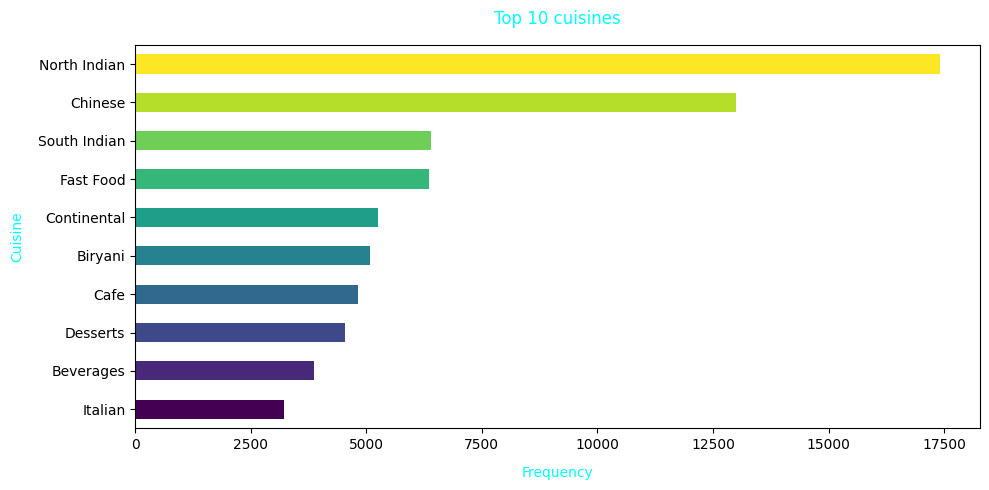

In [26]:
#Top cuisine
split_cuisines=data["cuisines"].str.split(",").explode().str.strip()
top_cuisines=split_cuisines.value_counts().head(10)
print("Top cuisine: ",top_cuisines.index[0],",",top_cuisines.values[0])
#visualization-barchart
plt.figure(figsize=(10,5))
color=plt.cm.viridis(np.linspace(0,1,len(top_cuisines)))
top_cuisines.sort_values().plot(kind="barh",color=color)
plt.title("Top 10 cuisines",color="cyan",pad=15)
plt.xlabel("Frequency",color="cyan",labelpad=10)
plt.ylabel("Cuisine",color="cyan",labelpad=10)
plt.style.use("dark_background")
plt.tight_layout()
plt.savefig("Top cuisines.png",dpi=300,bbox_inches="tight")
plt.show()

<h4>3.Online Orders vs Book Table</h4>

In [27]:
#3)online orders vs book table
online_orders=(data["online_order"]=="Yes").sum()
offline_orders=(data["book_table"]=="Yes").sum()
print("Online orders: ",online_orders)
print("Offline orders: ",offline_orders)


Online orders:  27206
Offline orders:  6304


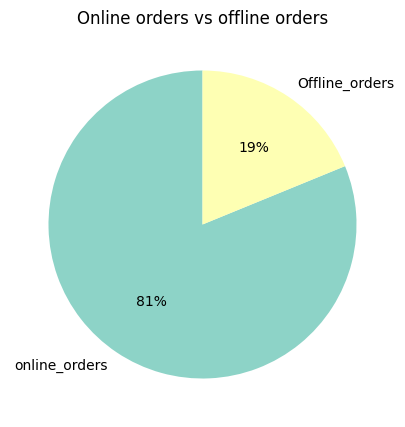

In [28]:
#visualization-piechart
plt.figure(figsize=(10,5),facecolor="white")
values=[online_orders,offline_orders]
plt.pie(values,labels=["online_orders","Offline_orders"],autopct="%1.f%%",startangle=90,textprops={"color":"black"})
plt.title("Online orders vs offline orders",color="black")
plt.savefig("online orders vs book table.png",dpi=300,bbox_inches="tight")
plt.show()


<h4>4.Rating distribution by Cost Category</h4>

In [29]:
#rating distribution by cost category
bins=[0,300,600,1000,3000,6000]
label=['Budget', 'Affordable', 'Mid-range', 'Premium', 'Luxury']
data["cost_bin"]=pd.cut(data["approx_cost(for two people)"],bins=bins,labels=label,right=False)
data.head()


avg_cost_range=data.groupby("cost_bin")["rate"].mean().round(2)
avg_cost_range

cost_bin
Budget        3.56
Affordable    3.59
Mid-range     3.75
Premium       4.06
Luxury        4.21
Name: rate, dtype: float64

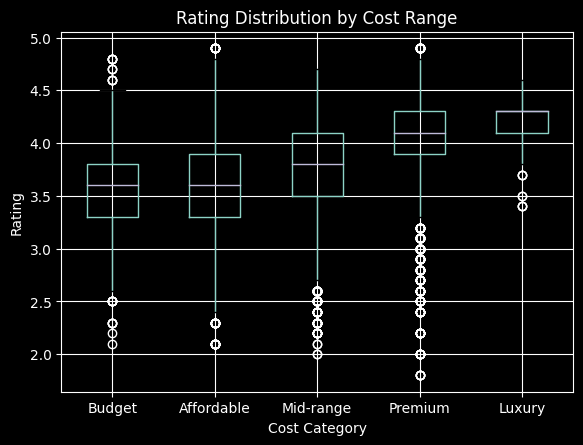

In [30]:
#visualization-box plot
data.boxplot(column='rate', by='cost_bin')
plt.xlabel("Cost Category")
plt.ylabel("Rating")
plt.title("Rating Distribution by Cost Range")
plt.suptitle("")
plt.savefig("rating distribution by cost category.png",dpi=300,bbox_inches="tight")
plt.show()


<h4>5.Restaurants with high votes but low ratings</h4>

In [31]:
#Restaurants with high votes but low ratings
high_votes = data["votes"].quantile(0.75)
low_rating = data["rate"].mean()
problem_restaurants = data[(data['votes'] >= high_votes) &(data['rate'] < low_rating)]


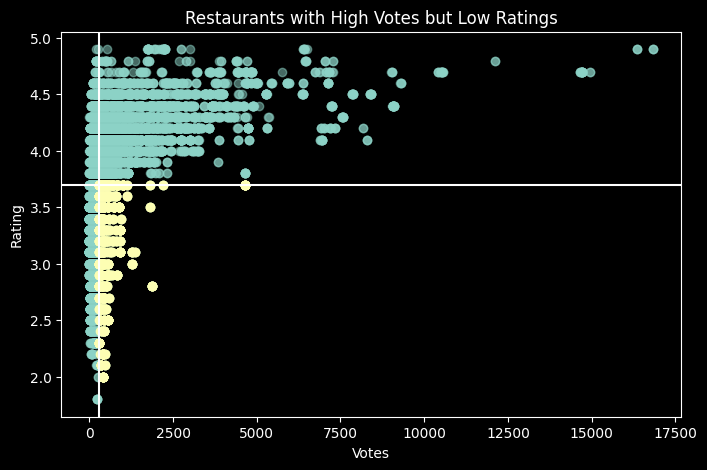

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(data['votes'], data['rate'], alpha=0.5)

# highlight problem restaurants
plt.scatter(
    problem_restaurants['votes'],
    problem_restaurants['rate'],
    alpha=0.9
)

plt.axhline(low_rating)                 # low rating threshold
plt.axvline(high_votes)          # high votes threshold

plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Restaurants with High Votes but Low Ratings")
plt.show()


In [33]:
#pip install geopy

<h4>6.Locating top restaurants with low cost and high rating </h4>

In [34]:
#Locating top restaurants with low cost and high rating 
df_unique = data.groupby(['name','address','listed_in(city)'], as_index=False).agg({
    'rate': 'mean',
    'votes': 'max',
    'approx_cost(for two people)': 'mean'
})
areas = df_unique['listed_in(city)'].dropna().unique()
len(areas)

30

In [35]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

geolocator = Nominatim(user_agent="zomato_area_mapping")

area_latlng = {}

for area in areas:
    try:
        location = geolocator.geocode(f"{area}, Bangalore, India", timeout=10)
        time.sleep(1)   # VERY IMPORTANT (API rate limit)
        
        if location:
            area_latlng[area] = (location.latitude, location.longitude)
        else:
            area_latlng[area] = (None, None)
    except:
        area_latlng[area] = (None, None)
area_coords_df = pd.DataFrame.from_dict(
    area_latlng,
    orient='index',
    columns=['lat','lng']
).reset_index().rename(columns={'index':'listed_in(city)'})
df_unique = df_unique.merge(area_coords_df, on='listed_in(city)', how='left')

In [36]:
low_cost_threshold = 300
high_rating_threshold = df_unique['rate'].mean()

top10 = (
    df_unique[
        (df_unique['approx_cost(for two people)'] <= low_cost_threshold) &
        (df_unique['rate'] >= high_rating_threshold)
    ]
    .sort_values(by='rate', ascending=False)
    .head(10)
)

In [37]:
import folium

bangalore_map = folium.Map(location=[12.97, 77.59], zoom_start=12)

for _, row in top10.dropna(subset=['lat','lng']).iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"""
        <b>{row['name']}</b><br>
        Area: {row['listed_in(city)']}<br>
        Rating: {row['rate']}<br>
        Cost: ₹{row['approx_cost(for two people)']}
        """,
        icon=folium.Icon(color='green')
    ).add_to(bangalore_map)



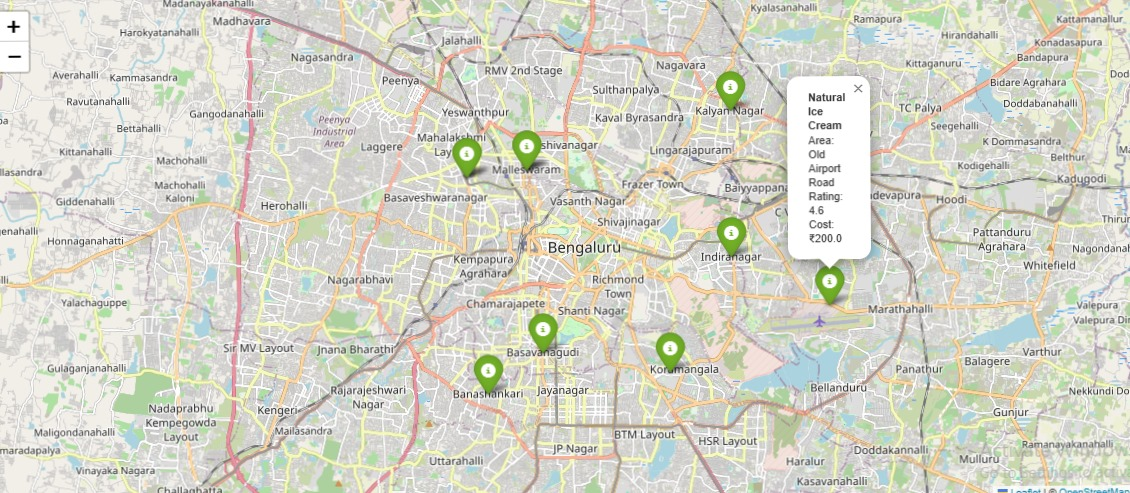

In [38]:
from IPython.display import Image, display

display(Image(filename="map.jpg", width=1000, height=300))
